# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rafli Aulia
- **Email:** muhammadrafli.tkn@gmail.com
- **ID Dicoding:** chi1ll

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?


- Pertanyaan 2: Apakah faktor cuaca (seperti suhu, kelembaban, dan kondisi hujan) berpengaruh signifikan terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [126]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [127]:
def extract_zip(zip_path, extract_path):
    import zipfile
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print('Done')

zip_path = 'Bike-sharing-dataset.zip'
extract_path = 'data/'
extract_zip(zip_path, extract_path)

Done


In [128]:
# menampung data dari day.csv dan hour.csv
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan beberapa baris pertama dari dataset
print("Data Harian:")
print(day_data.head())

print("\nData Per Jam:")
print(hour_data.head())

Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Per Jam

### Assessing Data

In [129]:
# Memeriksa struktur dataset memastikan semua
# kolom tidak memiliki masalah dengan tipe data

print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [130]:
# mengecek apakah ada nilai yang hilang (missing) di dalam dataset
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [131]:
# memeriksa jumlah baris yang terduplikat pada data
print("Data Harian Duplikat: ")
print(day_data.duplicated().sum())

print("Data Per Jam Duplikat: ")
print(hour_data.duplicated().sum())

Data Harian Duplikat: 
0
Data Per Jam Duplikat: 
0


In [132]:
# memeriksa stastik dasar seperti mean, median, max dan min
print("Deskripsi Harian: ")
print(day_data.describe())
print("\n\n")
print("Deskripsi Per Jam: ")
print(hour_data.describe())

Deskripsi Harian: 
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std     

### Cleaning Data

In [133]:
# drop data yang tidak diperlukan yaitu workingday dan instant
day_data = day_data.drop(['instant', 'workingday'], axis=1)
hour_data = hour_data.drop(['instant', 'workingday'], axis=1)

In [134]:
# Kolom dteday (tanggal) di dataset day.csv dan hour.csv harus dikonversi
# ke format datetime untuk analisis waktu yang lebih mudah.

day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [135]:
# mengganti nilai dari kolom 'season'
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_data['season'] = day_data['season'].map(season_mapping)
hour_data['season'] = hour_data['season'].map(season_mapping)

In [136]:
# mengganti nilai dari kolom 'weathersit'
weather_mapping = {
    1: "clear",
    2: "mist",
    3: "light rain",
    4: "heavy rain"
}
day_data['weathersit'] = day_data['weathersit'].map(weather_mapping)
hour_data['weathersit'] = hour_data['weathersit'].map(weather_mapping)

In [137]:
# mengganti nilai dari kolom 'weekday'
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

day_data['weekday'] = day_data['weekday'].map(weekday_mapping)
hour_data['weekday'] = hour_data['weekday'].map(weekday_mapping)

In [138]:
# Mengganti nilai dari kolom 'holiday'
holiday_mapping = {
    0: 'No',
    1: 'Yes'
}

day_data['holiday'] = day_data['holiday'].map(holisday_mapping)
hour_data['holiday'] = hour_data['holiday'].map(holisday_mapping)

In [139]:
# konversi variabel kategori
categorical_columns = ['season', 'weathersit', 'weekday', 'holiday']
for col in categorical_columns:
    day_data[col] = day_data[col].astype('category')
    hour_data[col] = hour_data[col].astype('category')

In [153]:
numerical_day = day_data.select_dtypes(include=['float64', 'int64'])
numerical_hour = hour_data.select_dtypes(include=['float64', 'int64'])

In [141]:
print("Data Harian Setelah Cleaning: ")
print(day_data.head())

print("\nData Per Jam Setelah Cleaning: ")
print(hour_data.head())

Data Harian Setelah Cleaning: 
      dteday  season  yr  mnth holiday    weekday weathersit      temp  \
0 2011-01-01  Spring   0     1      No   Saturday       mist  0.344167   
1 2011-01-02  Spring   0     1      No     Sunday       mist  0.363478   
2 2011-01-03  Spring   0     1      No     Monday      clear  0.196364   
3 2011-01-04  Spring   0     1      No    Tuesday      clear  0.200000   
4 2011-01-05  Spring   0     1      No  Wednesday      clear  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  
0  0.363625  0.805833   0.160446     331         654   985  
1  0.353739  0.696087   0.248539     131         670   801  
2  0.189405  0.437273   0.248309     120        1229  1349  
3  0.212122  0.590435   0.160296     108        1454  1562  
4  0.229270  0.436957   0.186900      82        1518  1600  

Data Per Jam Setelah Cleaning: 
      dteday  season  yr  mnth  hr holiday   weekday weathersit  temp   atemp  \
0 2011-01-01  Spring   0     1   0      No  



```
# This is formatted as code
```

## Exploratory Data Analysis (EDA)

### Explore ...

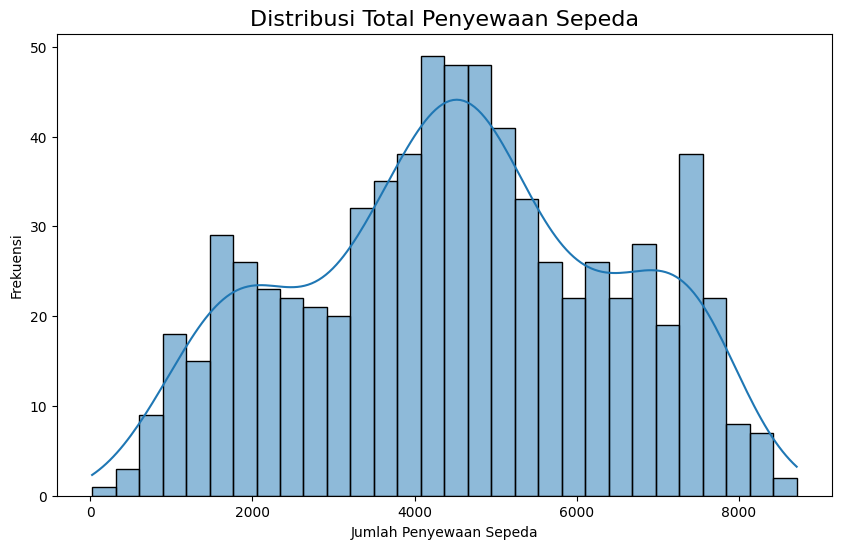

In [142]:
# Distribusi Penyewaan Sepeda (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Penyewaan Sepeda', fontsize=16)
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

Grafik distribusi menunjukkan bagaimana penyewaan sepeda tersebar. Sebagian besar jumlah penyewaan berada di kisaran menengah dengan beberapa nilai ekstrem yang lebih tinggi.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


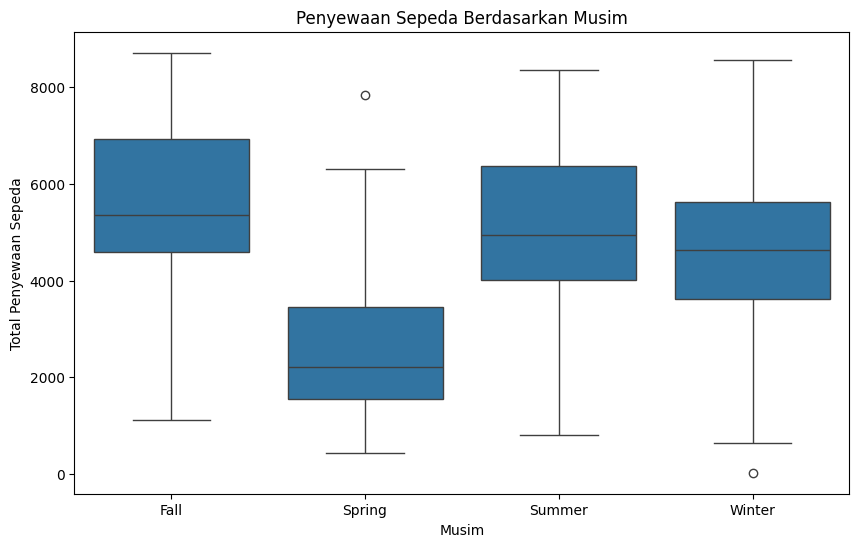

In [143]:
# Bike rentals by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

Dari boxplot, terlihat bahwa penyewaan sepeda paling tinggi terjadi pada musim panas (Summer), sementara penyewaan terendah terjadi di musim dingin (Winter).

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


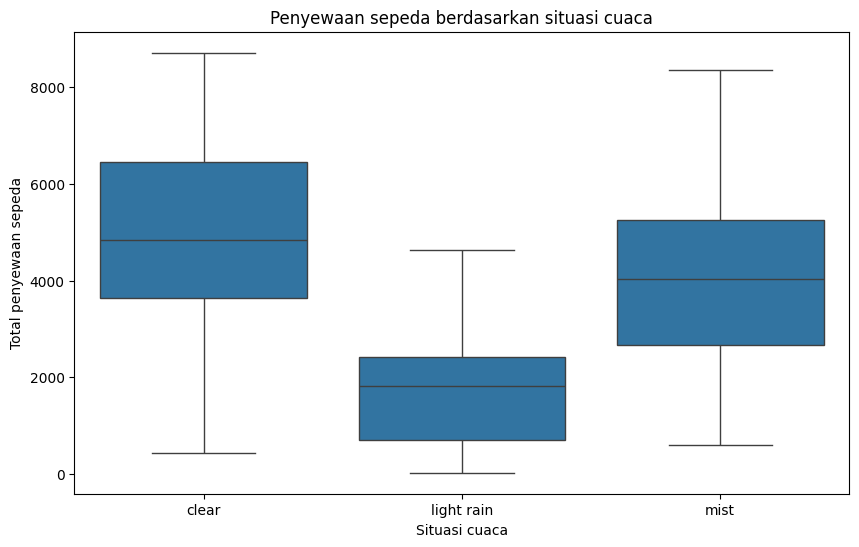

In [144]:
# Penyewaan sepeda berdasarkan situasi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Penyewaan sepeda berdasarkan situasi cuaca')
plt.xlabel('Situasi cuaca')
plt.ylabel('Total penyewaan sepeda')
plt.show()

Kondisi cuaca yang lebih baik (seperti kondisi cerah atau kabut ringan) cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi, sedangkan cuaca dengan hujan lebat memiliki penyewaan yang paling rendah.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


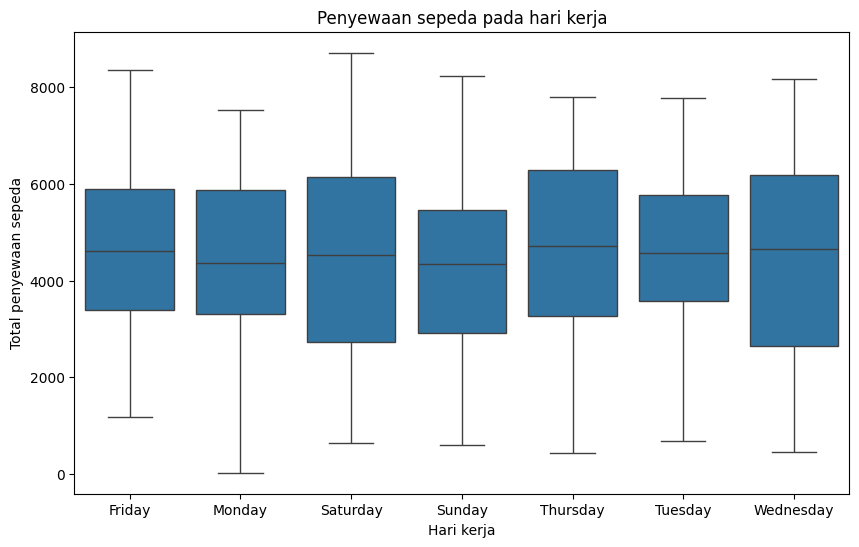

In [145]:
# Penyewaan sepeda pada hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=day_data)
plt.title('Penyewaan sepeda pada hari kerja')
plt.xlabel('Hari kerja')
plt.ylabel('Total penyewaan sepeda')
plt.show()

Tidak ada perbedaan yang terlalu signifikan antar hari dalam hal jumlah penyewaan sepeda, meskipun terlihat variasi kecil yang menunjukkan penurunan pada hari Minggu.

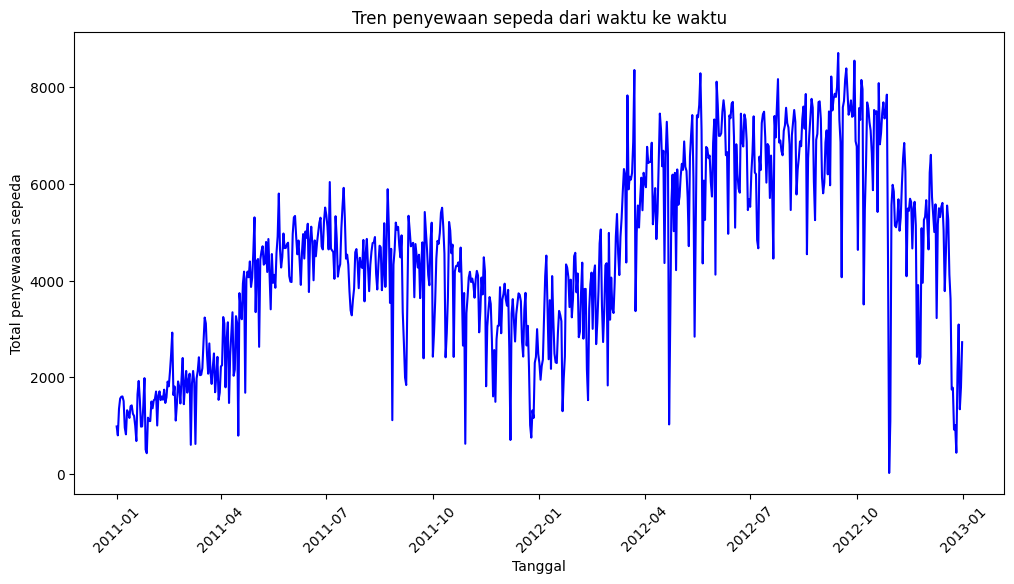

In [146]:
# Tren penyewaan sepeda dari waktu ke waktu (berdasarkan tanggal)
plt.figure(figsize=(12, 6))
plt.plot(day_data['dteday'], day_data['cnt'], color='b')
plt.title('Tren penyewaan sepeda dari waktu ke waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total penyewaaan sepeda')
plt.xticks(rotation=45)
plt.show()

Tren penyewaan sepeda dari waktu ke waktu menunjukkan fluktuasi, dengan beberapa periode mengalami peningkatan jumlah penyewaan sepeda secara signifikan.

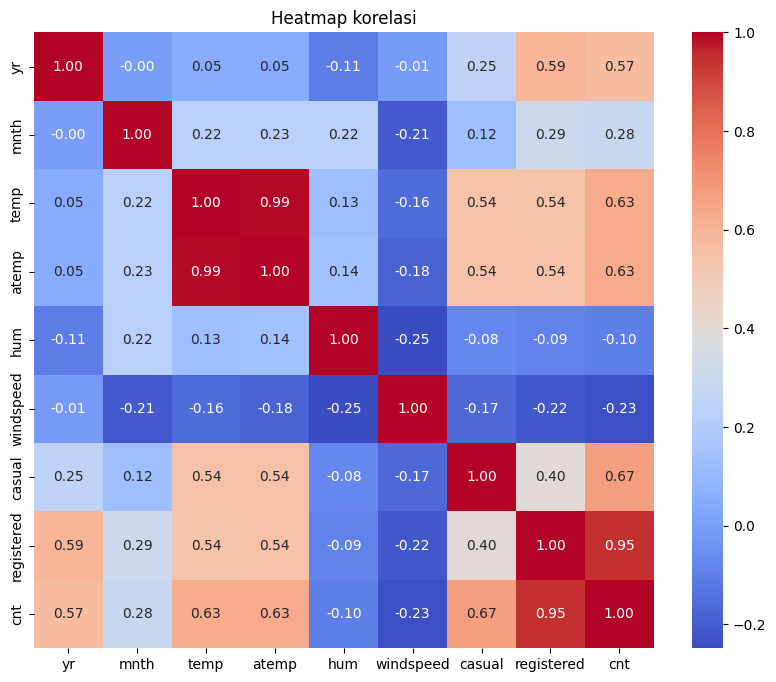

In [154]:
# Heatmap korelasi untuk variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_day.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi')
plt.show()

Heatmap korelasi menunjukkan hubungan antara variabel numerik. Misalnya, ada korelasi positif antara suhu (temp) dan jumlah penyewaan sepeda (cnt), serta korelasi negatif antara kelembapan (hum) dan penyewaan sepeda.

# **Berdasarkan Penyewaan Per Jam**

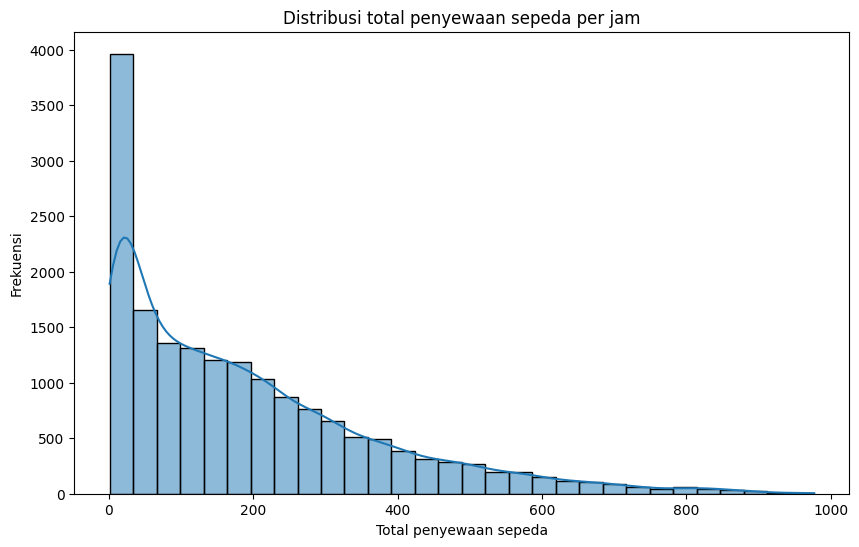

In [148]:
# Distribusi total penyewaan sepeda (cnt) per jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribusi total penyewaan sepeda per jam')
plt.xlabel('Total penyewaan sepeda')
plt.ylabel('Frekuensi')
plt.show()

Distribusi menunjukkan sebagian besar penyewaan sepeda berada pada rentang jumlah menengah hingga rendah. Ada sedikit puncak pada jumlah penyewaan yang lebih tinggi.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


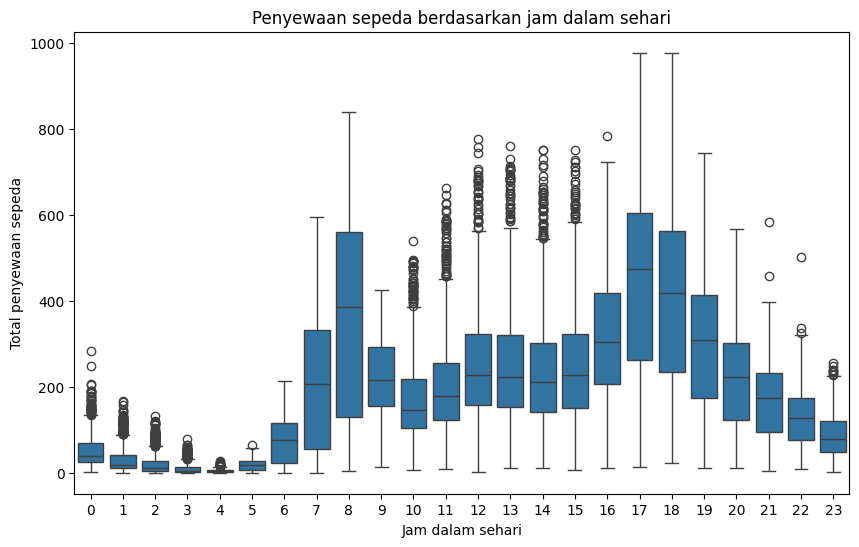

In [149]:
# Bike rentals by hour of the day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=hour_data)
plt.title('Penyewaan sepeda berdasarkan jam dalam sehari')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Total penyewaan sepeda')
plt.show()


Boxplot menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), kemungkinan terkait dengan jam berangkat dan pulang kerja.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


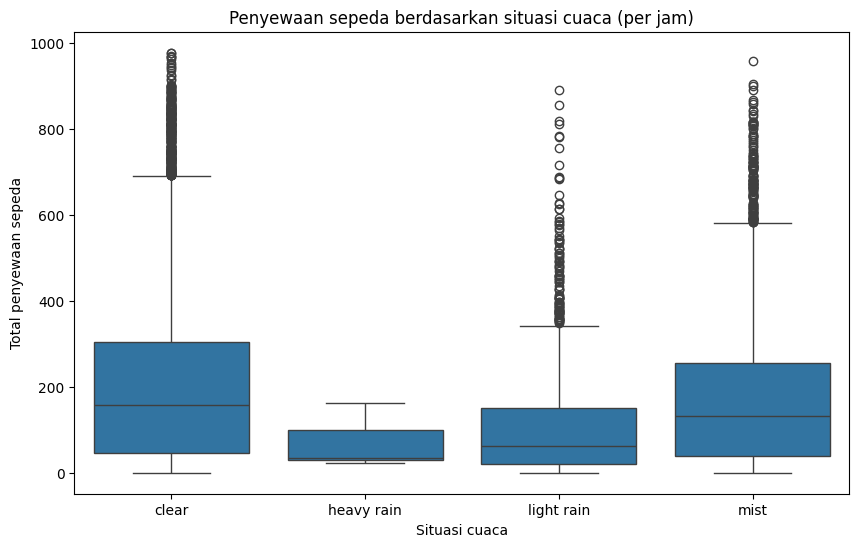

In [150]:
# Penyewaan sepeda berdasarkan situasi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Penyewaan sepeda berdasarkan situasi cuaca (per jam)')
plt.xlabel('Situasi cuaca')
plt.ylabel('Total penyewaan sepeda')
plt.show()

Penyewaan sepeda tertinggi terjadi pada cuaca cerah atau kabut ringan. Penyewaan sepeda cenderung menurun dalam kondisi hujan ringan dan sangat rendah pada cuaca hujan lebat.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


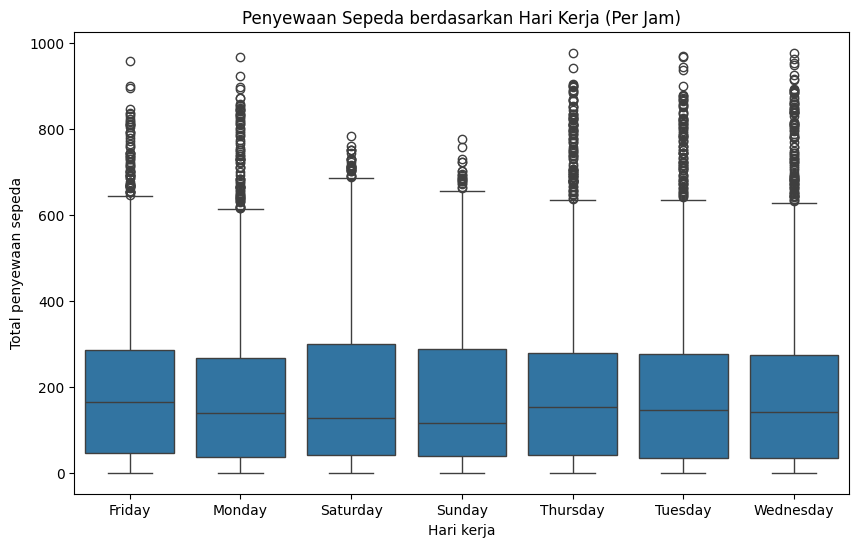

In [151]:
# Penyewaan sepeda pada hari kerja (data per jam)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=hour_data)
plt.title('Penyewaan Sepeda berdasarkan Hari Kerja (Per Jam)')
plt.xlabel('Hari kerja')
plt.ylabel('Total penyewaan sepeda')
plt.show()

Tidak ada perbedaan yang sangat signifikan antar hari dalam seminggu, tetapi terlihat sedikit variasi kecil pada hari Sabtu dan Minggu.

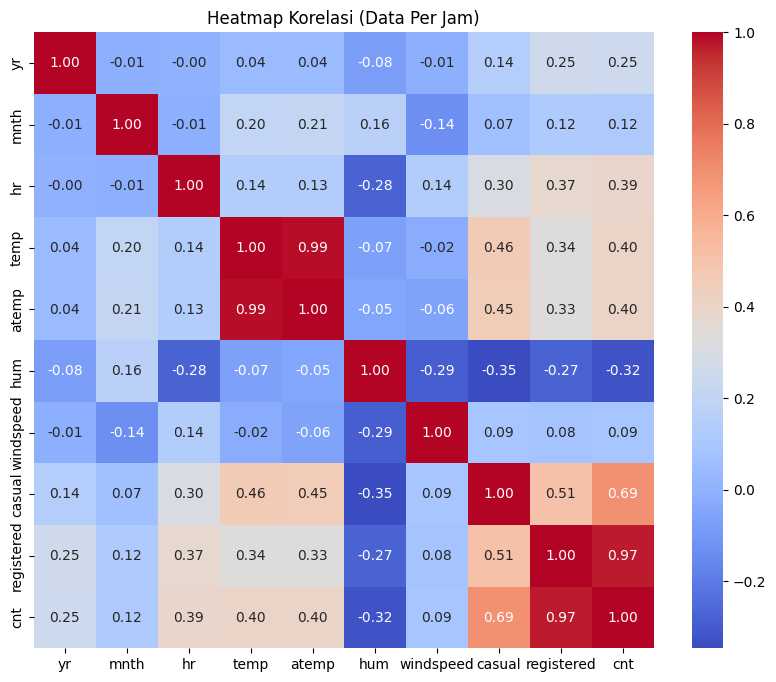

In [155]:
#  heatmap korelasi untuk variabel numerik dalam data per jam
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_hour.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi (Data Per Jam)')
plt.show()

Korelasi antara variabel numerik menunjukkan hubungan positif yang cukup kuat antara suhu (temp) dan jumlah penyewaan sepeda (cnt). Ada korelasi negatif antara kelembapan (hum) dan jumlah penyewaan sepeda, serta korelasi lemah antara kecepatan angin (windspeed) dan penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

In [156]:
# Mengumpulkan data untuk menunjukkan rata-rata penyewaan pada hari kerja vs akhir pekan
workday_vs_weekend = day_data.groupby('weekday')['cnt'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<ipython-input-156-f27ca47809bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_vs_weekend = day_data.groupby('weekday')['cnt'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


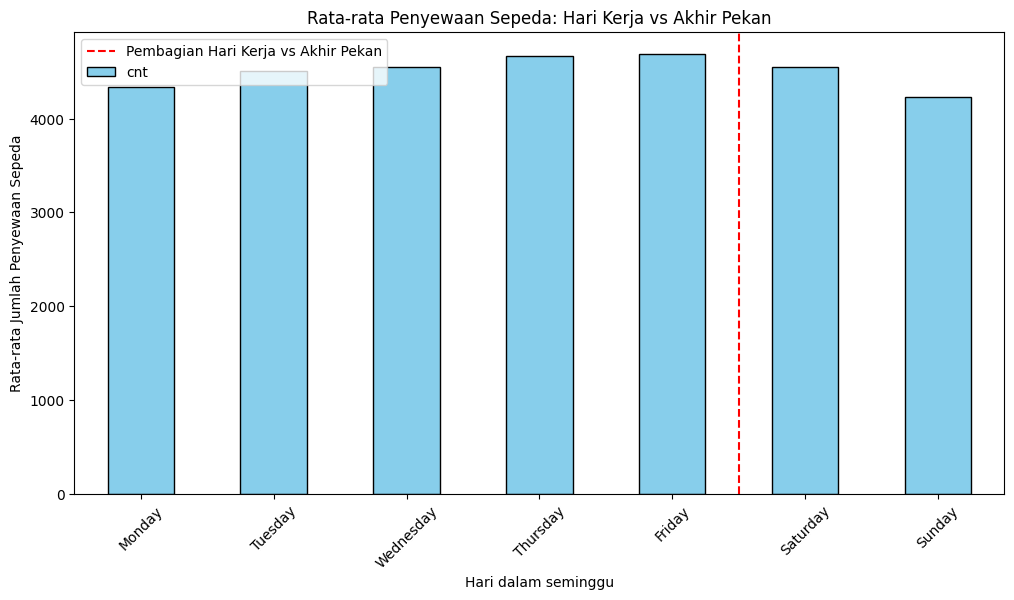

In [157]:
# Memplot diagram batang untuk penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(12, 6))
workday_vs_weekend.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari dalam seminggu')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.axvline(x=4.5, color='red', linestyle='--', label='Pembagian Hari Kerja vs Akhir Pekan')
plt.legend()
plt.show()

Pada visualisasi di atas, bar chart menampilkan rata-rata penyewaan sepeda berdasarkan hari dalam seminggu. Beberapa hal yang dapat diperhatikan:

*   Hari Kerja (Senin - Jumat): Rata-rata penyewaan sepeda pada hari kerja cenderung lebih tinggi.
* Akhir Pekan (Sabtu - Minggu): Rata-rata penyewaan sepeda sedikit menurun pada akhir pekan.
* Garis Pemisah Merah: Membagi antara hari kerja dan akhir pekan untuk memperjelas perbedaan pola penggunaan sepeda.

Ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja, yang mungkin terkait dengan penggunaan sepeda untuk perjalanan kerja atau sekolah.

### Pertanyaan 2:

In [158]:
# Rata-rata penyewaan sepeda untuk setiap situasi cuaca
weather_effect = day_data.groupby('weathersit')['cnt'].mean()

<ipython-input-158-6dbb3915641d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_effect = day_data.groupby('weathersit')['cnt'].mean()


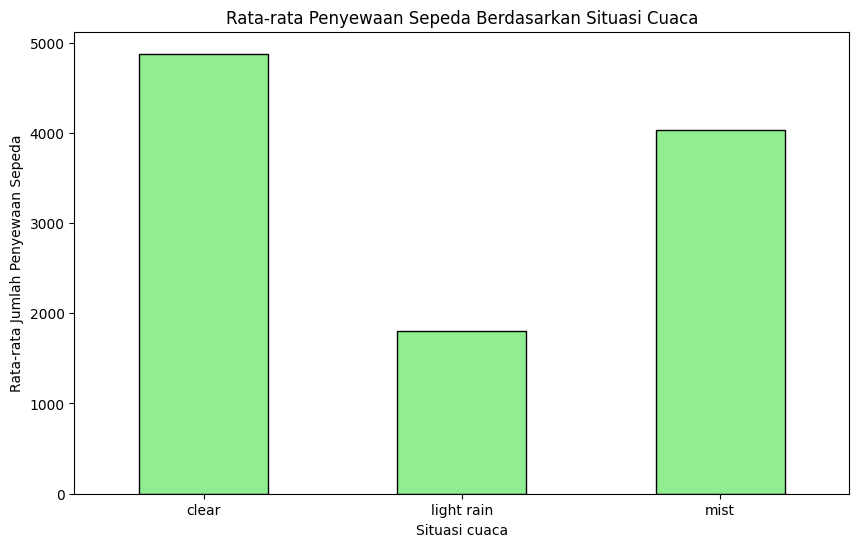

In [159]:
# Membuat diagram batang untuk penyewaan sepeda berdasarkan situasi cuaca
plt.figure(figsize=(10, 6))
weather_effect.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.show()

ada visualisasi di atas, bar chart menampilkan rata-rata penyewaan sepeda berdasarkan kondisi cuaca:

* Cuaca Cerah atau Kabut Ringan (Clear/Mist): Memiliki rata-rata penyewaan sepeda tertinggi.
* Cuaca Hujan Ringan (Light Rain): Penyewaan sepeda mulai berkurang secara signifikan.
* Cuaca Hujan Lebat (Heavy Rain): Memiliki rata-rata penyewaan sepeda yang paling rendah.

Dari visualisasi ini, terlihat bahwa faktor cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, di mana cuaca yang lebih buruk secara jelas menurunkan jumlah penyewaan.

In [160]:
# Membuat tempat sampah untuk suhu dan kelembapan
day_data['temp_bin'] = pd.cut(day_data['temp'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
day_data['hum_bin'] = pd.cut(day_data['hum'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

<ipython-input-161-4b5c9acc4b1a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_by_temp = day_data.groupby('temp_bin')['cnt'].mean()
<ipython-input-161-4b5c9acc4b1a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_by_hum = day_data.groupby('hum_bin')['cnt'].mean()


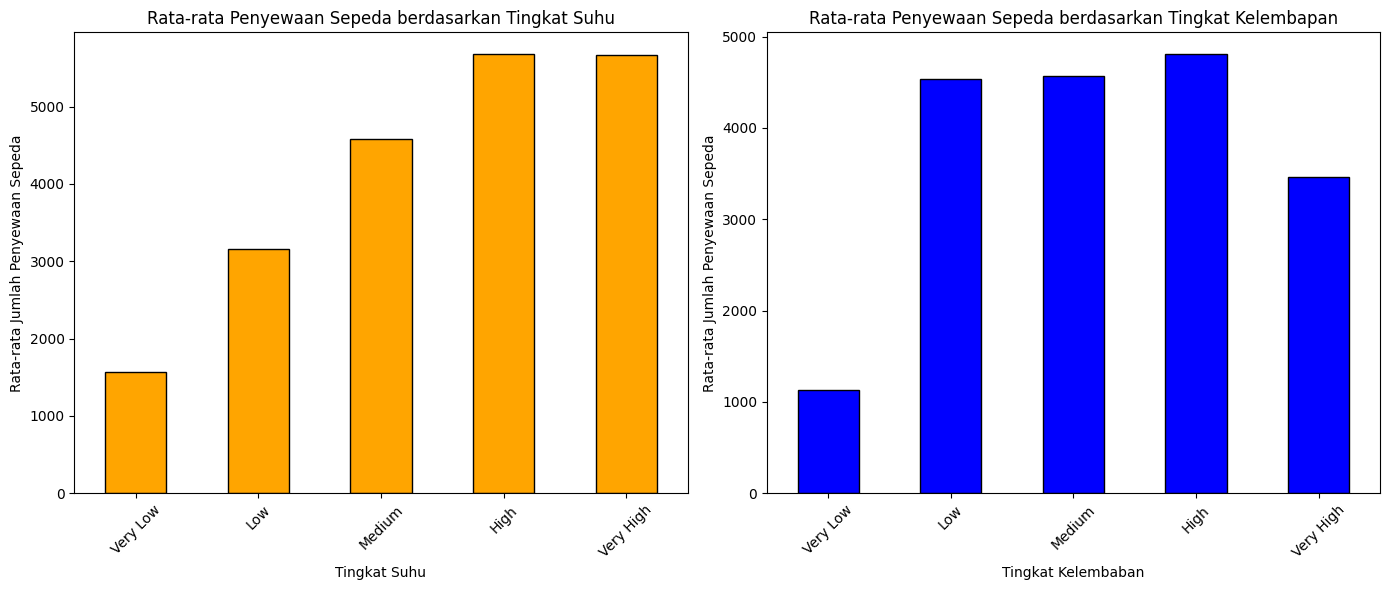

In [161]:
# Rata-rata penyewaan sepeda berdasarkan tempat sampah suhu
avg_rentals_by_temp = day_data.groupby('temp_bin')['cnt'].mean()

# Rata-rata penyewaan sepeda berdasarkan tempat sampah kelembaban
avg_rentals_by_hum = day_data.groupby('hum_bin')['cnt'].mean()

plt.figure(figsize=(14, 6))

# Diagram batang untuk Suhu vs Penyewaan Sepeda
plt.subplot(1, 2, 1)
avg_rentals_by_temp.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Tingkat Suhu')
plt.xlabel('Tingkat Suhu')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)

# Diagram batang untuk Kelembaban vs Penyewaan Sepeda
plt.subplot(1, 2, 2)
avg_rentals_by_hum.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Tingkat Kelembapan')
plt.xlabel('Tingkat Kelembaban')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Pada visualisasi di atas, grafik batang menunjukkan pengaruh suhu dan kelembaban terhadap jumlah penyewaan sepeda:

1. Rata-rata Penyewaan Sepeda Berdasarkan Tingkat Suhu (grafik kiri):

  - Ketika suhu meningkat dari Sangat Rendah ke Tinggi, rata-rata penyewaan sepeda juga meningkat, mencapai puncaknya pada tingkat Tinggi.
  - Suhu yang Sangat Tinggi menyebabkan penurunan kecil, yang mungkin disebabkan oleh suhu yang terlalu panas tidak nyaman untuk bersepeda.

2. Rata-rata Penyewaan Sepeda Berdasarkan Tingkat Kelembaban (grafik kanan):
  - Penyewaan sepeda cenderung lebih rendah pada tingkat Kelembaban Sangat Tinggi.
  - Pada tingkat Kelembaban Sedang, penyewaan sepeda tampak mencapai puncaknya.

Secara keseluruhan, suhu tampaknya memiliki pengaruh yang lebih kuat terhadap peningkatan jumlah penyewaan sepeda dibandingkan dengan kelembaban, yang menunjukkan pola penurunan ketika kelembaban sangat tinggi.

# Conclusion

# Kesimpulan Pertanyaan 1
Pola penggunaan sepeda menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini kemungkinan disebabkan oleh penggunaan sepeda sebagai alat transportasi untuk keperluan bekerja atau sekolah selama hari kerja. Pada akhir pekan, rata-rata penyewaan sepeda sedikit menurun, yang mungkin mengindikasikan penggunaan sepeda lebih bersifat rekreasi daripada sebagai alat transportasi rutin.

# Kesimpulan Pertanyaan 2
Faktor cuaca, seperti kondisi cuaca, suhu, dan kelembaban, memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan sepeda tertinggi terjadi pada cuaca cerah atau kabut ringan, sementara kondisi cuaca buruk seperti hujan ringan hingga hujan lebat menyebabkan penurunan drastis pada penyewaan. Suhu juga memiliki pengaruh yang kuat terhadap jumlah penyewaan sepeda, di mana suhu yang lebih tinggi cenderung meningkatkan penggunaan sepeda, menunjukkan preferensi pengguna untuk bersepeda dalam cuaca yang lebih hangat. Sebaliknya, kelembaban memiliki pengaruh yang lebih lemah, namun tingkat kelembaban yang sangat tinggi dapat menurunkan jumlah penyewaan sepeda. Secara keseluruhan, cuaca yang lebih baik dan suhu yang lebih hangat berkontribusi pada peningkatan penyewaan sepeda, sementara kondisi cuaca yang lebih buruk dan kelembaban yang tinggi cenderung mengurangi penyewaan.